# Rozhodovací stromy (Decision Trees)

Strom je pojem z teorie grafů a v informatice typ datové struktury. Skládá se z vrcholů grafu a orientovaných cest 
mezi vrcholy. Má vždy jeden výzchozí vrchol (kořen), z něhož se větví do orientovaných hran k dalším vrcholům.
Kořen nemá žádného předka, ostatní vrcholy mají vždy maximálně jednoho předka. Vyhledávání ve stromové struktuře je velmi rychlé, rychlý je tedy pak i algoritmus stromy využívající.

Cílem rozhodovacích stromů je identifikovat objekty, popsané různými atributy, do tříd. Je vytvořen ze vstupních dat, 
řádků v tabulce, kde ke každému řádku je přidělena správná třída (učení s učitelem). V každém uzlu dochází k rozhodování 
dle jednoho parametru (sloupce v tabulce). Z každého uzlu vede konečný počet hran, výsledek rozhodování je tedy třeba 
diskretizovat (např. hodnota atributu je menší, nebo rovna či větší než hranice). Výsledný strom musí objekty od sebe
co nejlépe rozlišit (rozdělit do tříd). K tomu je třeba použít metriku, která určuje, jak daný rozhodovací
test od sebe objekty rozděluje. Kořenem je vždy vrchol, který objekty rozděluje nejlépe.


## Příklad: identifikace názvu barvy dle kódu RGB
V tomto příkladu vyzkoušíme využít rozhodovací strom k přidělení názvu barvy (třídy) kódované ve formátu RGB (3 parametry).

Nejdříve načteme potřebné knihovny

- numpy: vědecká knihovna pro práci s daty
- matplotlib: knihovna pro vykreslování grafů
- sklearn: vědecká knihovna pro strojové učení
 * tree: knihovna pro práci se stromy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

Pak vytvoříme zdrojová data (dataset). Nejdříve vytvoříme 6 proměnných pro 6 barev patřících do 6 tříd. Ty pak složíme do jedné matice ve formátu `list()` s názvem `colors`.

In [2]:
red = [250, 5, 5]
blue = [5, 250, 5]
green = [5, 5, 250]
yellow = [250, 5, 250]
magenta = [250, 250, 5]
cyan = [5, 250, 250]
colors = [red, blue, green, yellow, magenta, cyan]

Pak si vytvoříme `list()` obsahující názvy tříd (názvy barev) `colors_names`.

In [3]:
colors_names = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan']

Není vytvoříme *dataset* pro tréning, tedy pro vytvoření rozhodovacícho stromu - množinu dat obsahující vstupní data `X` a k nim náležející třídu `Y`. Vstupních dat bude 100 * 6, tedy pro každou třídu 100 barev vygenerovaných ze základní barvy (např. z proměnné `red`) tím, že ke každé složce barvy přičteme náhodně vygenerované číslo pomocí funkce pro genrování pseoudonáhodných celých čísel z diskrétního rovnoměrného rozdělení `np.random.randint()`. První parametr funkce určuje minimální vegenrované číslo, druhý maximální vygenerované čislo a třetí délku vygenerovaného vektoru (3, jeden pro každou složku barvy v RGB)

In [4]:
X = []
Y = []
for idx in range(100):
    for idy in range(len(colors)):
        X.append(colors[idy]+np.random.randint(-5, 5, 3))
        Y.append(colors_names[idy])    

Vytvoříme instanci objektu `tree.DecisionTreeClassifier()`, který slouží pro generování rozhodovacích stromů, a uložíme ji do proměnné `clf`.

In [6]:
clf = tree.DecisionTreeClassifier()

Nyní objekt natrénujeme pomocí trénovacích dat, tedy necháme algoritmus nalézt optimální strukturu rozhodovacího stromu. K tomu slouží metoda objektu (funkce) `fit()`. Prvním parametrem této funkce je matice vstupních dat `X` a druhým parametrem je vektor správných tříd `Y`, do kterých jednotlivé řádky dat patří.

In [7]:
clf.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

V návratovou hodnotou funkce `fit()` je natrénovaný strom (ten je i v proměnné `clf`). V jeho parametrech je i položka `criterion`, tedy metrika využitá pro hodnocení výsledku rozdělení do tříd. Výchozím nastavení je metrika *gini*. Ta je počítáná jako:

$\displaystyle G = 1-\sum_j{p_j^2}$

kde $p_j$ je pravděpodobnost, že vstupní data budou přidělena do $j$-té třídy, tedy 

$\displaystyle p_j = \frac{n_j}{n}$

kde $n_j$ je počet prvků z trénovací množiny patřících do $j$-té třídy a $n$ je počet prvků trénovací množiny..

Výsledný strom si můžeme vykreslit pomocí knihovny matplotlib funkcí `tree.plot_tree()`.

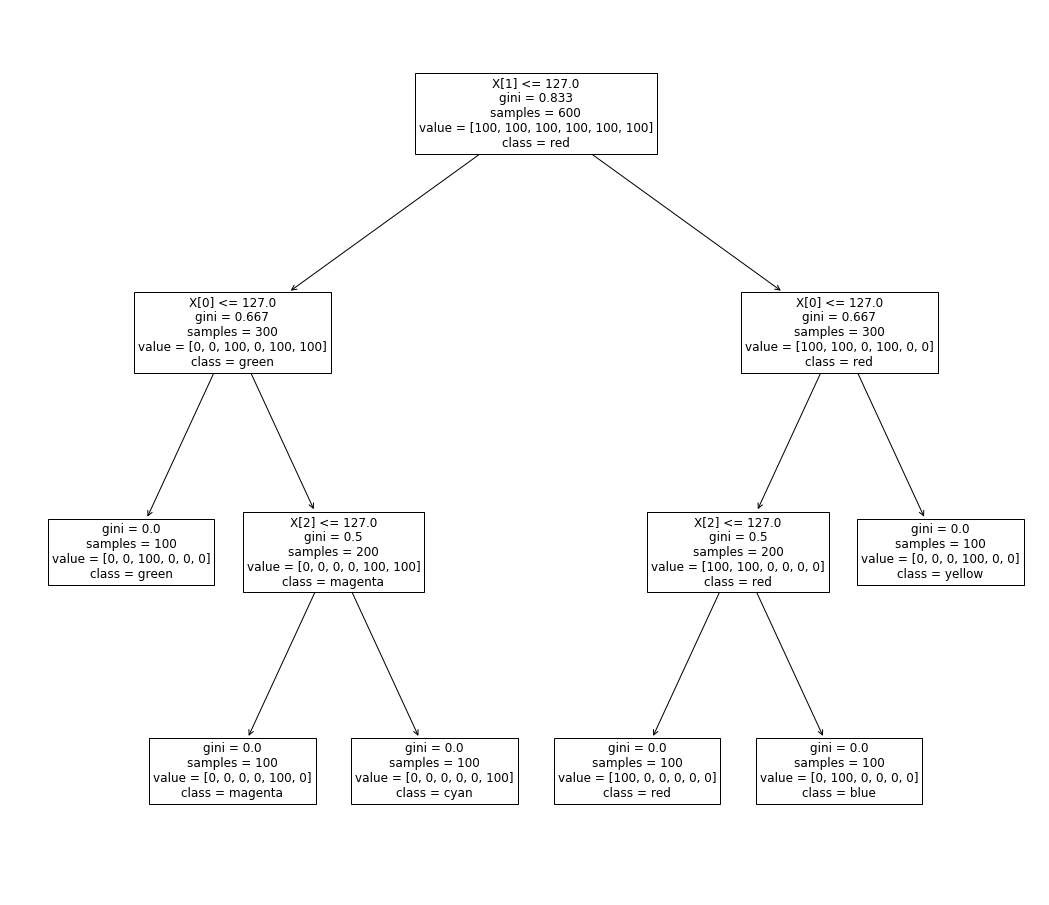

In [8]:
fig, ax = plt.subplots(1,1, figsize=(18, 16))
tree.plot_tree(clf, fontsize=12, class_names=colors_names, ax = ax);

Strom nyní můžeme využít k pojmenování barvy dle kódu RGB využitím funkce `predict()`. Například pro vychozí data z proměnné `colors` je výsledek následující:

In [9]:
clf.predict(colors)

array(['red', 'blue', 'green', 'yellow', 'magenta', 'cyan'], dtype='<U7')

Druhou metrikou, kterou nabízí objekt ` tree.DecisionTreeClassifier()` je *entropy*. Ta vycházi z teorie informační entropie dle předpisu

$\displaystyle G = -\sum_j{p_j log_2 p_j}$

kde $p_j$ je opět pravděpodobnost, že vstupní data budou přidělena do $j$-té třídy, tedy 

$\displaystyle p_j = \frac{n_j}{n}$

kde $n_j$ je počet prvků z trénovací množiny patřících do $j$-té třídy a $n$ je počet prvků trénovací množiny..

Pokud chcem využít metriku *entropy* namísto gini, musíme při tot definovat při vytváření instance objektu  `tree.DecisionTreeClassifier()` parametrem `criterion='entropy'`.

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion='entropy')
clf2.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Výsledný strom si můžeme opět vykreslit pomocí knihovny matplotlib funkcí `tree.plot_tree()`.

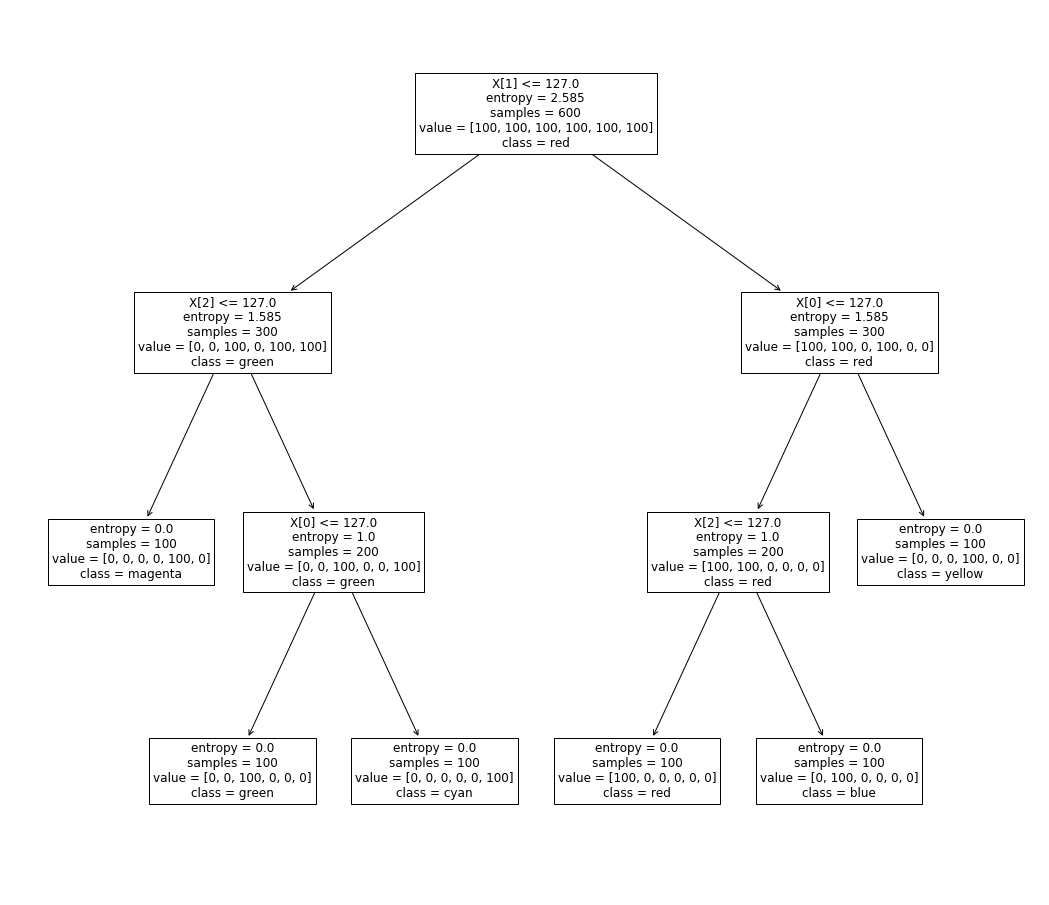

In [11]:
fig, ax = plt.subplots(1,1, figsize=(18, 16))
tree.plot_tree(clf2, fontsize=12, class_names=colors_names, ax = ax);

Pro tento příklad je výsledný strom stejně složitý, parametry jsou jen brány v jiném pořadí.